In [1]:
from datasets import load_dataset
import json
from pprint import pprint

### **<span style="color:orange">Data exploration</span>**
**<span style="color:yellow">Load the dataset</span>**

In [2]:
dataset = load_dataset("naver-clova-ix/cord-v2")

**<span style="color:yellow">Dataset structure</span>**

In [3]:
dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'ground_truth'],
        num_rows: 800
    })
    validation: Dataset({
        features: ['image', 'ground_truth'],
        num_rows: 100
    })
    test: Dataset({
        features: ['image', 'ground_truth'],
        num_rows: 100
    })
})

**<span style="color:yellow">Loading a sample image and its corresponding ground truth</span>**

In [4]:
sample_data = dataset["train"][0]
sample_data

{'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=864x1296>,
 'ground_truth': '{"gt_parse": {"menu": [{"nm": "Nasi Campur Bali", "cnt": "1 x", "price": "75,000"}, {"nm": "Bbk Bengil Nasi", "cnt": "1 x", "price": "125,000"}, {"nm": "MilkShake Starwb", "cnt": "1 x", "price": "37,000"}, {"nm": "Ice Lemon Tea", "cnt": "1 x", "price": "24,000"}, {"nm": "Nasi Ayam Dewata", "cnt": "1 x", "price": "70,000"}, {"nm": "Free Ice Tea", "cnt": "3 x", "price": "0"}, {"nm": "Organic Green Sa", "cnt": "1 x", "price": "65,000"}, {"nm": "Ice Tea", "cnt": "1 x", "price": "18,000"}, {"nm": "Ice Orange", "cnt": "1 x", "price": "29,000"}, {"nm": "Ayam Suir Bali", "cnt": "1 x", "price": "85,000"}, {"nm": "Tahu Goreng", "cnt": "2 x", "price": "36,000"}, {"nm": "Tempe Goreng", "cnt": "2 x", "price": "36,000"}, {"nm": "Tahu Telor Asin", "cnt": "1 x", "price": "40,000."}, {"nm": "Nasi Goreng Samb", "cnt": "1 x", "price": "70,000"}, {"nm": "Bbk Panggang Sam", "cnt": "3 x", "price": "366,000"}, {"nm": 

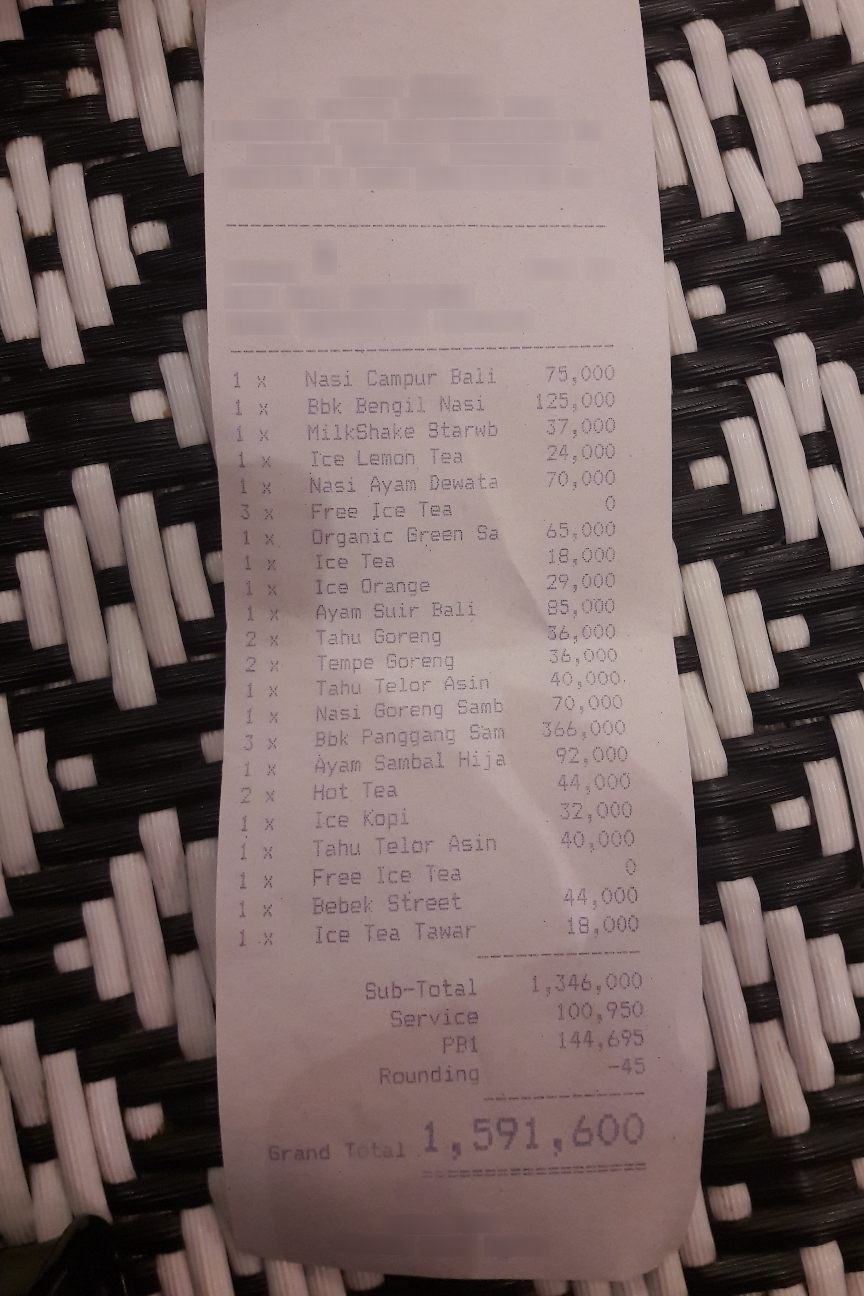

In [5]:
sample_image = dataset["train"][0]["image"]
sample_image

**<span style="color:yellow">Checking image sizes in the training set</span>**

In [6]:
image_size_list = []
for i in range(len(dataset["train"])):
    image_size_list.append(dataset["train"][i]["image"].size)

print(len(set(image_size_list)), "unique image sizes exist in the dataset.")
print()
set(image_size_list)

63 unique image sizes exist in the dataset.



{(204, 418),
 (228, 658),
 (238, 670),
 (268, 478),
 (272, 364),
 (278, 586),
 (296, 474),
 (312, 416),
 (368, 720),
 (384, 576),
 (386, 476),
 (413, 1024),
 (432, 648),
 (472, 904),
 (522, 646),
 (534, 1280),
 (549, 1280),
 (558, 658),
 (576, 864),
 (582, 1592),
 (605, 1280),
 (610, 1280),
 (622, 1280),
 (642, 1900),
 (648, 1152),
 (660, 1394),
 (681, 1280),
 (686, 1250),
 (700, 1280),
 (711, 1023),
 (720, 1280),
 (736, 1280),
 (763, 1280),
 (800, 1280),
 (806, 1280),
 (819, 1088),
 (864, 1152),
 (864, 1296),
 (930, 1280),
 (941, 1280),
 (960, 1280),
 (960, 1706),
 (973, 1280),
 (984, 1498),
 (1016, 1280),
 (1024, 1198),
 (1054, 1304),
 (1080, 1920),
 (1084, 1124),
 (1108, 1477),
 (1108, 1478),
 (1152, 1728),
 (1196, 1196),
 (1224, 1838),
 (1511, 2772),
 (1536, 2730),
 (1551, 2701),
 (1569, 2672),
 (1773, 2364),
 (1836, 3264),
 (2304, 4096),
 (2376, 4224),
 (3024, 4032)}

**<span style="color:yellow">Checking the ground_truth</span>**

In [7]:
sample_data["ground_truth"]

'{"gt_parse": {"menu": [{"nm": "Nasi Campur Bali", "cnt": "1 x", "price": "75,000"}, {"nm": "Bbk Bengil Nasi", "cnt": "1 x", "price": "125,000"}, {"nm": "MilkShake Starwb", "cnt": "1 x", "price": "37,000"}, {"nm": "Ice Lemon Tea", "cnt": "1 x", "price": "24,000"}, {"nm": "Nasi Ayam Dewata", "cnt": "1 x", "price": "70,000"}, {"nm": "Free Ice Tea", "cnt": "3 x", "price": "0"}, {"nm": "Organic Green Sa", "cnt": "1 x", "price": "65,000"}, {"nm": "Ice Tea", "cnt": "1 x", "price": "18,000"}, {"nm": "Ice Orange", "cnt": "1 x", "price": "29,000"}, {"nm": "Ayam Suir Bali", "cnt": "1 x", "price": "85,000"}, {"nm": "Tahu Goreng", "cnt": "2 x", "price": "36,000"}, {"nm": "Tempe Goreng", "cnt": "2 x", "price": "36,000"}, {"nm": "Tahu Telor Asin", "cnt": "1 x", "price": "40,000."}, {"nm": "Nasi Goreng Samb", "cnt": "1 x", "price": "70,000"}, {"nm": "Bbk Panggang Sam", "cnt": "3 x", "price": "366,000"}, {"nm": "Ayam Sambal Hija", "cnt": "1 x", "price": "92,000"}, {"nm": "Hot Tea", "cnt": "2 x", "pric

In [8]:
pprint(sample_data["ground_truth"])

('{"gt_parse": {"menu": [{"nm": "Nasi Campur Bali", "cnt": "1 x", "price": '
 '"75,000"}, {"nm": "Bbk Bengil Nasi", "cnt": "1 x", "price": "125,000"}, '
 '{"nm": "MilkShake Starwb", "cnt": "1 x", "price": "37,000"}, {"nm": "Ice '
 'Lemon Tea", "cnt": "1 x", "price": "24,000"}, {"nm": "Nasi Ayam Dewata", '
 '"cnt": "1 x", "price": "70,000"}, {"nm": "Free Ice Tea", "cnt": "3 x", '
 '"price": "0"}, {"nm": "Organic Green Sa", "cnt": "1 x", "price": "65,000"}, '
 '{"nm": "Ice Tea", "cnt": "1 x", "price": "18,000"}, {"nm": "Ice Orange", '
 '"cnt": "1 x", "price": "29,000"}, {"nm": "Ayam Suir Bali", "cnt": "1 x", '
 '"price": "85,000"}, {"nm": "Tahu Goreng", "cnt": "2 x", "price": "36,000"}, '
 '{"nm": "Tempe Goreng", "cnt": "2 x", "price": "36,000"}, {"nm": "Tahu Telor '
 'Asin", "cnt": "1 x", "price": "40,000."}, {"nm": "Nasi Goreng Samb", "cnt": '
 '"1 x", "price": "70,000"}, {"nm": "Bbk Panggang Sam", "cnt": "3 x", "price": '
 '"366,000"}, {"nm": "Ayam Sambal Hija", "cnt": "1 x", "price":

### **<span style="color:orange">Converting the string dictionary to json</span>**

In [9]:
sample_data_ground_truth_json = json.loads(sample_data["ground_truth"])
sample_data_ground_truth_json

{'gt_parse': {'menu': [{'nm': 'Nasi Campur Bali',
    'cnt': '1 x',
    'price': '75,000'},
   {'nm': 'Bbk Bengil Nasi', 'cnt': '1 x', 'price': '125,000'},
   {'nm': 'MilkShake Starwb', 'cnt': '1 x', 'price': '37,000'},
   {'nm': 'Ice Lemon Tea', 'cnt': '1 x', 'price': '24,000'},
   {'nm': 'Nasi Ayam Dewata', 'cnt': '1 x', 'price': '70,000'},
   {'nm': 'Free Ice Tea', 'cnt': '3 x', 'price': '0'},
   {'nm': 'Organic Green Sa', 'cnt': '1 x', 'price': '65,000'},
   {'nm': 'Ice Tea', 'cnt': '1 x', 'price': '18,000'},
   {'nm': 'Ice Orange', 'cnt': '1 x', 'price': '29,000'},
   {'nm': 'Ayam Suir Bali', 'cnt': '1 x', 'price': '85,000'},
   {'nm': 'Tahu Goreng', 'cnt': '2 x', 'price': '36,000'},
   {'nm': 'Tempe Goreng', 'cnt': '2 x', 'price': '36,000'},
   {'nm': 'Tahu Telor Asin', 'cnt': '1 x', 'price': '40,000.'},
   {'nm': 'Nasi Goreng Samb', 'cnt': '1 x', 'price': '70,000'},
   {'nm': 'Bbk Panggang Sam', 'cnt': '3 x', 'price': '366,000'},
   {'nm': 'Ayam Sambal Hija', 'cnt': '1 x', 'pric

**<span style="color:yellow">The keys in ground_truth</span>**

In [10]:
sample_data_ground_truth_json.keys()

dict_keys(['gt_parse', 'meta', 'valid_line', 'roi', 'repeating_symbol', 'dontcare'])

**<span style="color:pink">ground_truth: `gt_parse`</span>**

In [11]:
sample_data_ground_truth_json["gt_parse"]

{'menu': [{'nm': 'Nasi Campur Bali', 'cnt': '1 x', 'price': '75,000'},
  {'nm': 'Bbk Bengil Nasi', 'cnt': '1 x', 'price': '125,000'},
  {'nm': 'MilkShake Starwb', 'cnt': '1 x', 'price': '37,000'},
  {'nm': 'Ice Lemon Tea', 'cnt': '1 x', 'price': '24,000'},
  {'nm': 'Nasi Ayam Dewata', 'cnt': '1 x', 'price': '70,000'},
  {'nm': 'Free Ice Tea', 'cnt': '3 x', 'price': '0'},
  {'nm': 'Organic Green Sa', 'cnt': '1 x', 'price': '65,000'},
  {'nm': 'Ice Tea', 'cnt': '1 x', 'price': '18,000'},
  {'nm': 'Ice Orange', 'cnt': '1 x', 'price': '29,000'},
  {'nm': 'Ayam Suir Bali', 'cnt': '1 x', 'price': '85,000'},
  {'nm': 'Tahu Goreng', 'cnt': '2 x', 'price': '36,000'},
  {'nm': 'Tempe Goreng', 'cnt': '2 x', 'price': '36,000'},
  {'nm': 'Tahu Telor Asin', 'cnt': '1 x', 'price': '40,000.'},
  {'nm': 'Nasi Goreng Samb', 'cnt': '1 x', 'price': '70,000'},
  {'nm': 'Bbk Panggang Sam', 'cnt': '3 x', 'price': '366,000'},
  {'nm': 'Ayam Sambal Hija', 'cnt': '1 x', 'price': '92,000'},
  {'nm': 'Hot Tea', '

**<span style="color:pink">ground_truth: `meta`</span>**

In [12]:
sample_data_ground_truth_json["meta"]

{'version': '2.0.0',
 'split': 'train',
 'image_id': 0,
 'image_size': {'width': 864, 'height': 1296}}

### **<span style="color:orange">Preparing the dataset for training</span>**

**<span style="color:yellow">Extracting `gt_parse` and storing them in a list</span>**

In [13]:
ground_truth = json.loads(sample_data["ground_truth"])
if "gt_parses" in ground_truth:  # when multiple ground truths are available, e.g., docvqa
    assert isinstance(ground_truth["gt_parses"], list)
    gt_jsons = ground_truth["gt_parses"]
else:
    assert "gt_parse" in ground_truth and isinstance(ground_truth["gt_parse"], dict)
    gt_jsons = [ground_truth["gt_parse"]]

In [14]:
print(ground_truth)
print(gt_jsons)

{'gt_parse': {'menu': [{'nm': 'Nasi Campur Bali', 'cnt': '1 x', 'price': '75,000'}, {'nm': 'Bbk Bengil Nasi', 'cnt': '1 x', 'price': '125,000'}, {'nm': 'MilkShake Starwb', 'cnt': '1 x', 'price': '37,000'}, {'nm': 'Ice Lemon Tea', 'cnt': '1 x', 'price': '24,000'}, {'nm': 'Nasi Ayam Dewata', 'cnt': '1 x', 'price': '70,000'}, {'nm': 'Free Ice Tea', 'cnt': '3 x', 'price': '0'}, {'nm': 'Organic Green Sa', 'cnt': '1 x', 'price': '65,000'}, {'nm': 'Ice Tea', 'cnt': '1 x', 'price': '18,000'}, {'nm': 'Ice Orange', 'cnt': '1 x', 'price': '29,000'}, {'nm': 'Ayam Suir Bali', 'cnt': '1 x', 'price': '85,000'}, {'nm': 'Tahu Goreng', 'cnt': '2 x', 'price': '36,000'}, {'nm': 'Tempe Goreng', 'cnt': '2 x', 'price': '36,000'}, {'nm': 'Tahu Telor Asin', 'cnt': '1 x', 'price': '40,000.'}, {'nm': 'Nasi Goreng Samb', 'cnt': '1 x', 'price': '70,000'}, {'nm': 'Bbk Panggang Sam', 'cnt': '3 x', 'price': '366,000'}, {'nm': 'Ayam Sambal Hija', 'cnt': '1 x', 'price': '92,000'}, {'nm': 'Hot Tea', 'cnt': '2 x', 'price

**<span style="color:yellow">Convert the JSON object (each gt_parse) into a token sequence string</span>**

The `json2token` function is designed to convert a JSON object into a string that represents a sequence of tokens. The function handles different types of JSON structures, including dictionaries, lists, and other basic types like strings, numbers, or booleans. The main idea is to create a flat token sequence that captures the structure and content of the JSON object.

Logic breakdown:

1. **Handling Dictionaries (`dict`):**
   - If the dictionary has only one key and that key is `"text_sequence"`, the function returns the value associated with this key directly. This suggests that the value is a pre-formatted text sequence, and the function avoids further processing.
   - Otherwise, the function constructs a string by iterating through each key-value pair in the dictionary:
     - If `sort_json_key` is `True`, the keys are sorted in reverse order before processing. This can be useful for consistent serialization and potentially for importance ordering.
     - For each key, the function wraps the tokenized representation of the value with tags `<s_key>` and `</s_key>`. These tags are used to delineate different sections of the JSON structure, similar to how HTML tags work.
     - The function recursively calls `json2token` on the value associated with each key, allowing for nested dictionaries to be processed.

2. **Handling Lists (`list`):**
   - For a list, the function iterates over each element and recursively calls `json2token` on each item.
   - The resulting token sequences for each list item are then joined together with a `<sep/>` separator. This separator helps to distinguish between elements in the list.

3. **Handling Other Types (base types like `str`, `int`, etc.):**
   - For all other types (which are not dictionaries or lists), the function simply converts the object to a string and returns it. This is the base case for the recursion.

### Purpose and Usage

This strategy is typically used in scenarios where complex data structures need to be converted into a linear sequence of tokens for tasks like natural language processing (NLP), where models often require input in a sequential format. The use of tags like `<s_key>` and separators like `<sep/>` helps retain the structure and relationships within the original JSON data, enabling models to potentially understand and utilize this structure.

**<span style="color:pink">Ex1 JSON:</span>**
```
'sub_total': {'etc': '-45',
               'service_price': '100,950',
               'subtotal_price': '1,346,000',
               'tax_price': '144,695'},
```
**Goal:**
```
<s_sub_total><s_tax_price>144,695</s_tax_price><s_subtotal_price>1,346,000</s_subtotal_price><s_service_price>100,950</s_service_price><s_etc>-45</s_etc></s_sub_total>
```
-----------------------------
**<span style="color:pink">Ex2 JSON:</span>**
```
'total': {'total_price': '1,591,600'}
```

**Goal:**
```
<s_total><s_total_price>1,591,600</s_total_price></s_total>
```
-----------------------------
**<span style="color:pink">Full Conversion</span>**

**JSON**
```
'sub_total': {'etc': '-45',
               'service_price': '100,950',
               'subtotal_price': '1,346,000',
               'tax_price': '144,695'},
'total': {'total_price': '1,591,600'}
```

**Output**

```
<s_total><s_total_price>1,591,600</s_total_price></s_total><s_sub_total><s_tax_price>144,695</s_tax_price><s_subtotal_price>1,346,000</s_subtotal_price><s_service_price>100,950</s_service_price><s_etc>-45</s_etc></s_sub_total>
```

In [15]:
from typing import Any, Dict

def json2token( obj: Any, sort_json_key: bool = True):
    """
    Convert the JSON object into a token sequence string.

    Args:
        obj (Any): The JSON object to convert, which can be a dictionary, list, or other types.
        sort_json_key (bool): Whether to sort the keys of a dictionary. Default is True.

    Returns:
        str: A string representing the token sequence extracted from the JSON object.
    """
    if type(obj) == dict:
        if len(obj) == 1 and "text_sequence" in obj:
            return obj["text_sequence"]
        else:
            output = ""
            if sort_json_key:
                keys = sorted(obj.keys(), reverse=True)
            else:
                keys = obj.keys()
            for k in keys:
                output += (
                    fr"<s_{k}>"
                    + json2token(obj[k], sort_json_key)
                    + fr"</s_{k}>"
                )
            return output
    elif type(obj) == list:
        return r"<sep/>".join(
            [json2token(item, sort_json_key) for item in obj]
        )
    else:
        obj = str(obj)
        return obj

**<span style="color:pink">Raw JSON</span>**

In [16]:
pprint(sample_data_ground_truth_json["gt_parse"])

{'menu': [{'cnt': '1 x', 'nm': 'Nasi Campur Bali', 'price': '75,000'},
          {'cnt': '1 x', 'nm': 'Bbk Bengil Nasi', 'price': '125,000'},
          {'cnt': '1 x', 'nm': 'MilkShake Starwb', 'price': '37,000'},
          {'cnt': '1 x', 'nm': 'Ice Lemon Tea', 'price': '24,000'},
          {'cnt': '1 x', 'nm': 'Nasi Ayam Dewata', 'price': '70,000'},
          {'cnt': '3 x', 'nm': 'Free Ice Tea', 'price': '0'},
          {'cnt': '1 x', 'nm': 'Organic Green Sa', 'price': '65,000'},
          {'cnt': '1 x', 'nm': 'Ice Tea', 'price': '18,000'},
          {'cnt': '1 x', 'nm': 'Ice Orange', 'price': '29,000'},
          {'cnt': '1 x', 'nm': 'Ayam Suir Bali', 'price': '85,000'},
          {'cnt': '2 x', 'nm': 'Tahu Goreng', 'price': '36,000'},
          {'cnt': '2 x', 'nm': 'Tempe Goreng', 'price': '36,000'},
          {'cnt': '1 x', 'nm': 'Tahu Telor Asin', 'price': '40,000.'},
          {'cnt': '1 x', 'nm': 'Nasi Goreng Samb', 'price': '70,000'},
          {'cnt': '3 x', 'nm': 'Bbk Panggang

**<span style="color:pink">Conversion</span>**

In [17]:
pprint([
    json2token(
        gt_json,
        sort_json_key=True,
    )
    for gt_json in gt_jsons  # load json from list of json
])

['<s_total><s_total_price>1,591,600</s_total_price></s_total><s_sub_total><s_tax_price>144,695</s_tax_price><s_subtotal_price>1,346,000</s_subtotal_price><s_service_price>100,950</s_service_price><s_etc>-45</s_etc></s_sub_total><s_menu><s_price>75,000</s_price><s_nm>Nasi '
 'Campur Bali</s_nm><s_cnt>1 '
 'x</s_cnt><sep/><s_price>125,000</s_price><s_nm>Bbk Bengil '
 'Nasi</s_nm><s_cnt>1 x</s_cnt><sep/><s_price>37,000</s_price><s_nm>MilkShake '
 'Starwb</s_nm><s_cnt>1 x</s_cnt><sep/><s_price>24,000</s_price><s_nm>Ice '
 'Lemon Tea</s_nm><s_cnt>1 x</s_cnt><sep/><s_price>70,000</s_price><s_nm>Nasi '
 'Ayam Dewata</s_nm><s_cnt>1 x</s_cnt><sep/><s_price>0</s_price><s_nm>Free Ice '
 'Tea</s_nm><s_cnt>3 x</s_cnt><sep/><s_price>65,000</s_price><s_nm>Organic '
 'Green Sa</s_nm><s_cnt>1 x</s_cnt><sep/><s_price>18,000</s_price><s_nm>Ice '
 'Tea</s_nm><s_cnt>1 x</s_cnt><sep/><s_price>29,000</s_price><s_nm>Ice '
 'Orange</s_nm><s_cnt>1 x</s_cnt><sep/><s_price>85,000</s_price><s_nm>Ayam '
 'Suir Bali

**<span style="color:yellow">Store all the ground_truths in a list</span>**

In [18]:
gt_token_sequences = []
gt_token_sequences.append(
        [
            json2token(
                gt_json,
                sort_json_key=False,
            )
            for gt_json in gt_jsons  # load json from list of json
        ]
    )
gt_token_sequences # can be more than one, e.g., DocVQA Task 1

[['<s_menu><s_nm>Nasi Campur Bali</s_nm><s_cnt>1 x</s_cnt><s_price>75,000</s_price><sep/><s_nm>Bbk Bengil Nasi</s_nm><s_cnt>1 x</s_cnt><s_price>125,000</s_price><sep/><s_nm>MilkShake Starwb</s_nm><s_cnt>1 x</s_cnt><s_price>37,000</s_price><sep/><s_nm>Ice Lemon Tea</s_nm><s_cnt>1 x</s_cnt><s_price>24,000</s_price><sep/><s_nm>Nasi Ayam Dewata</s_nm><s_cnt>1 x</s_cnt><s_price>70,000</s_price><sep/><s_nm>Free Ice Tea</s_nm><s_cnt>3 x</s_cnt><s_price>0</s_price><sep/><s_nm>Organic Green Sa</s_nm><s_cnt>1 x</s_cnt><s_price>65,000</s_price><sep/><s_nm>Ice Tea</s_nm><s_cnt>1 x</s_cnt><s_price>18,000</s_price><sep/><s_nm>Ice Orange</s_nm><s_cnt>1 x</s_cnt><s_price>29,000</s_price><sep/><s_nm>Ayam Suir Bali</s_nm><s_cnt>1 x</s_cnt><s_price>85,000</s_price><sep/><s_nm>Tahu Goreng</s_nm><s_cnt>2 x</s_cnt><s_price>36,000</s_price><sep/><s_nm>Tempe Goreng</s_nm><s_cnt>2 x</s_cnt><s_price>36,000</s_price><sep/><s_nm>Tahu Telor Asin</s_nm><s_cnt>1 x</s_cnt><s_price>40,000.</s_price><sep/><s_nm>Nasi Go

**<span style="color:yellow">Full class</span>**

In [19]:
from datasets import load_dataset
from torch.utils.data import Dataset
from typing import Any, Dict
import random
import json


class LlavaDataset(Dataset):
    """
    PyTorch Dataset for LLaVa, designed to work with datasets from HuggingFace.

    This class takes a HuggingFace Dataset as input and processes each entry,
    which consists of an image path (in png/jpg/jpeg format) and corresponding
    ground truth data (in json/jsonl/txt format).

    Attributes:
        split (str): The dataset split to load (e.g., "train", "test").
        sort_json_key (bool): If True, keys in the JSON ground truth are sorted.
        dataset (Dataset): The HuggingFace dataset loaded according to the specified split.
        dataset_length (int): The number of samples in the dataset.
        gt_token_sequences (List[List[str]]): A list of tokenized ground truth sequences
            for each sample in the dataset.

    Args:
        dataset_name_or_path (str): The name of the dataset or the path to the dataset files.
        split (str): The dataset split to use. Default is "train".
        sort_json_key (bool): Whether to sort keys in JSON ground truth. Default is True.
    """

    def __init__(
        self,
        dataset_name_or_path: str,
        split: str = "train",
        sort_json_key: bool = True,
    ):
        super().__init__()

        self.split = split
        self.sort_json_key = sort_json_key

        self.dataset = load_dataset(dataset_name_or_path, split=self.split)
        self.dataset_length = len(self.dataset)

        self.gt_token_sequences = []
        for sample in self.dataset:
            ground_truth = json.loads(sample["ground_truth"])
            if "gt_parses" in ground_truth:  # when multiple ground truths are available, e.g., docvqa
                assert isinstance(ground_truth["gt_parses"], list)
                gt_jsons = ground_truth["gt_parses"]
            else:
                assert "gt_parse" in ground_truth and isinstance(ground_truth["gt_parse"], dict)
                gt_jsons = [ground_truth["gt_parse"]]

            self.gt_token_sequences.append(
                [
                    self.json2token(
                        gt_json,
                        sort_json_key=self.sort_json_key,
                    )
                    for gt_json in gt_jsons  # load json from list of json
                ]
            )

    def json2token(self, obj: Any, sort_json_key: bool = True):
        """
        Convert a JSON object into a token sequence string.

        Args:
            obj (Any): The JSON object to convert, which can be a dictionary, list, or other types.
            sort_json_key (bool): Whether to sort the keys of a dictionary. Default is True.

        Returns:
            str: A string representing the token sequence extracted from the JSON object.
        """
        if type(obj) == dict:
            if len(obj) == 1 and "text_sequence" in obj:
                return obj["text_sequence"]
            else:
                output = ""
                if sort_json_key:
                    keys = sorted(obj.keys(), reverse=True)
                else:
                    keys = obj.keys()
                for k in keys:
                    output += (
                        fr"<s_{k}>"
                        + self.json2token(obj[k], sort_json_key)
                        + fr"</s_{k}>"
                    )
                return output
        elif type(obj) == list:
            return r"<sep/>".join(
                [self.json2token(item, sort_json_key) for item in obj]
            )
        else:
            obj = str(obj)
            return obj

    def __len__(self) -> int:
        return self.dataset_length

    def __getitem__(self, idx: int) -> Dict:
        """
        Retrieve a single data point from the dataset by index.

        Args:
            idx (int): The index of the sample to retrieve.

        Returns:
            Tuple:
                - image: The image associated with the sample.
                - target_sequence: A string representing the tokenized ground truth sequence.
        """
        sample = self.dataset[idx]

        # inputs
        image = sample["image"]
        target_sequence = random.choice(self.gt_token_sequences[idx])  # can be more than one, e.g., DocVQA Task 1

        return image, target_sequence

**<span style="color:yellow">Running `LlavaDataset` class on the whole dataset</span>**

In [20]:
train_dataset = LlavaDataset("naver-clova-ix/cord-v2",  split="train", sort_json_key=False)
val_dataset = LlavaDataset("naver-clova-ix/cord-v2", split="validation", sort_json_key=False)

**<span style="color:yellow">Checking an example's token sequence</span>**

In [21]:
train_example = train_dataset[0]
image, ground_truth = train_example
pprint(ground_truth)

('<s_menu><s_nm>Nasi Campur Bali</s_nm><s_cnt>1 '
 'x</s_cnt><s_price>75,000</s_price><sep/><s_nm>Bbk Bengil Nasi</s_nm><s_cnt>1 '
 'x</s_cnt><s_price>125,000</s_price><sep/><s_nm>MilkShake '
 'Starwb</s_nm><s_cnt>1 x</s_cnt><s_price>37,000</s_price><sep/><s_nm>Ice '
 'Lemon Tea</s_nm><s_cnt>1 x</s_cnt><s_price>24,000</s_price><sep/><s_nm>Nasi '
 'Ayam Dewata</s_nm><s_cnt>1 '
 'x</s_cnt><s_price>70,000</s_price><sep/><s_nm>Free Ice Tea</s_nm><s_cnt>3 '
 'x</s_cnt><s_price>0</s_price><sep/><s_nm>Organic Green Sa</s_nm><s_cnt>1 '
 'x</s_cnt><s_price>65,000</s_price><sep/><s_nm>Ice Tea</s_nm><s_cnt>1 '
 'x</s_cnt><s_price>18,000</s_price><sep/><s_nm>Ice Orange</s_nm><s_cnt>1 '
 'x</s_cnt><s_price>29,000</s_price><sep/><s_nm>Ayam Suir Bali</s_nm><s_cnt>1 '
 'x</s_cnt><s_price>85,000</s_price><sep/><s_nm>Tahu Goreng</s_nm><s_cnt>2 '
 'x</s_cnt><s_price>36,000</s_price><sep/><s_nm>Tempe Goreng</s_nm><s_cnt>2 '
 'x</s_cnt><s_price>36,000</s_price><sep/><s_nm>Tahu Telor Asin</s_nm><s_cnt>1 '
 

**<span style="color:yellow">Checking 10 (image, ground_truth) pairs</span>**

In [22]:
counter = 0
for idx in range(len(train_dataset)):
    image, target_sequence = train_dataset[idx]
    print(f"[INST] <image>\nExtract JSON [\INST] {target_sequence}")
    counter +=1
    if counter == 10:
        break

[INST] <image>
Extract JSON [\INST] <s_menu><s_nm>Nasi Campur Bali</s_nm><s_cnt>1 x</s_cnt><s_price>75,000</s_price><sep/><s_nm>Bbk Bengil Nasi</s_nm><s_cnt>1 x</s_cnt><s_price>125,000</s_price><sep/><s_nm>MilkShake Starwb</s_nm><s_cnt>1 x</s_cnt><s_price>37,000</s_price><sep/><s_nm>Ice Lemon Tea</s_nm><s_cnt>1 x</s_cnt><s_price>24,000</s_price><sep/><s_nm>Nasi Ayam Dewata</s_nm><s_cnt>1 x</s_cnt><s_price>70,000</s_price><sep/><s_nm>Free Ice Tea</s_nm><s_cnt>3 x</s_cnt><s_price>0</s_price><sep/><s_nm>Organic Green Sa</s_nm><s_cnt>1 x</s_cnt><s_price>65,000</s_price><sep/><s_nm>Ice Tea</s_nm><s_cnt>1 x</s_cnt><s_price>18,000</s_price><sep/><s_nm>Ice Orange</s_nm><s_cnt>1 x</s_cnt><s_price>29,000</s_price><sep/><s_nm>Ayam Suir Bali</s_nm><s_cnt>1 x</s_cnt><s_price>85,000</s_price><sep/><s_nm>Tahu Goreng</s_nm><s_cnt>2 x</s_cnt><s_price>36,000</s_price><sep/><s_nm>Tempe Goreng</s_nm><s_cnt>2 x</s_cnt><s_price>36,000</s_price><sep/><s_nm>Tahu Telor Asin</s_nm><s_cnt>1 x</s_cnt><s_price>40,

**<span style="color:yellow">Creating the tempelate for inferencing and fine-tuning LLAVA</span>**

In [23]:
prompt = f"[INST] <image>\nExtract JSON [\INST] {ground_truth}"
pprint(prompt)

('[INST] <image>\n'
 'Extract JSON [\\INST] <s_menu><s_nm>Nasi Campur Bali</s_nm><s_cnt>1 '
 'x</s_cnt><s_price>75,000</s_price><sep/><s_nm>Bbk Bengil Nasi</s_nm><s_cnt>1 '
 'x</s_cnt><s_price>125,000</s_price><sep/><s_nm>MilkShake '
 'Starwb</s_nm><s_cnt>1 x</s_cnt><s_price>37,000</s_price><sep/><s_nm>Ice '
 'Lemon Tea</s_nm><s_cnt>1 x</s_cnt><s_price>24,000</s_price><sep/><s_nm>Nasi '
 'Ayam Dewata</s_nm><s_cnt>1 '
 'x</s_cnt><s_price>70,000</s_price><sep/><s_nm>Free Ice Tea</s_nm><s_cnt>3 '
 'x</s_cnt><s_price>0</s_price><sep/><s_nm>Organic Green Sa</s_nm><s_cnt>1 '
 'x</s_cnt><s_price>65,000</s_price><sep/><s_nm>Ice Tea</s_nm><s_cnt>1 '
 'x</s_cnt><s_price>18,000</s_price><sep/><s_nm>Ice Orange</s_nm><s_cnt>1 '
 'x</s_cnt><s_price>29,000</s_price><sep/><s_nm>Ayam Suir Bali</s_nm><s_cnt>1 '
 'x</s_cnt><s_price>85,000</s_price><sep/><s_nm>Tahu Goreng</s_nm><s_cnt>2 '
 'x</s_cnt><s_price>36,000</s_price><sep/><s_nm>Tempe Goreng</s_nm><s_cnt>2 '
 'x</s_cnt><s_price>36,000</s_price><sep

### **<span style="color:Orange">Convert back the model's output to JSON</span>**

In [24]:
from transformers import AutoProcessor
MODEL_ID = "llava-hf/llava-v1.6-mistral-7b-hf"

processor = AutoProcessor.from_pretrained(MODEL_ID)

In [25]:
# let's turn that into JSON
import re
def token2json(tokens, is_inner_value=False, added_vocab=None):
        """
        Convert a (generated) token sequence into an ordered JSON format.
        """
        if added_vocab is None:
            added_vocab = processor.tokenizer.get_added_vocab()

        output = {}

        while tokens:
            start_token = re.search(r"<s_(.*?)>", tokens, re.IGNORECASE)
            if start_token is None:
                break
            key = start_token.group(1)
            key_escaped = re.escape(key)

            end_token = re.search(rf"</s_{key_escaped}>", tokens, re.IGNORECASE)
            start_token = start_token.group()
            if end_token is None:
                tokens = tokens.replace(start_token, "")
            else:
                end_token = end_token.group()
                start_token_escaped = re.escape(start_token)
                end_token_escaped = re.escape(end_token)
                content = re.search(
                    f"{start_token_escaped}(.*?){end_token_escaped}", tokens, re.IGNORECASE | re.DOTALL
                )
                if content is not None:
                    content = content.group(1).strip()
                    if r"<s_" in content and r"</s_" in content:  # non-leaf node
                        value = token2json(content, is_inner_value=True, added_vocab=added_vocab)
                        if value:
                            if len(value) == 1:
                                value = value[0]
                            output[key] = value
                    else:  # leaf nodes
                        output[key] = []
                        for leaf in content.split(r"<sep/>"):
                            leaf = leaf.strip()
                            if leaf in added_vocab and leaf[0] == "<" and leaf[-2:] == "/>":
                                leaf = leaf[1:-2]  # for categorical special tokens
                            output[key].append(leaf)
                        if len(output[key]) == 1:
                            output[key] = output[key][0]

                tokens = tokens[tokens.find(end_token) + len(end_token) :].strip()
                if tokens[:6] == r"<sep/>":  # non-leaf nodes
                    return [output] + token2json(tokens[6:], is_inner_value=True, added_vocab=added_vocab)

        if len(output):
            return [output] if is_inner_value else output
        else:
            return [] if is_inner_value else {"text_sequence": tokens}

In [29]:
prompt

'[INST] <image>\nExtract JSON [\\INST] <s_menu><s_nm>Nasi Campur Bali</s_nm><s_cnt>1 x</s_cnt><s_price>75,000</s_price><sep/><s_nm>Bbk Bengil Nasi</s_nm><s_cnt>1 x</s_cnt><s_price>125,000</s_price><sep/><s_nm>MilkShake Starwb</s_nm><s_cnt>1 x</s_cnt><s_price>37,000</s_price><sep/><s_nm>Ice Lemon Tea</s_nm><s_cnt>1 x</s_cnt><s_price>24,000</s_price><sep/><s_nm>Nasi Ayam Dewata</s_nm><s_cnt>1 x</s_cnt><s_price>70,000</s_price><sep/><s_nm>Free Ice Tea</s_nm><s_cnt>3 x</s_cnt><s_price>0</s_price><sep/><s_nm>Organic Green Sa</s_nm><s_cnt>1 x</s_cnt><s_price>65,000</s_price><sep/><s_nm>Ice Tea</s_nm><s_cnt>1 x</s_cnt><s_price>18,000</s_price><sep/><s_nm>Ice Orange</s_nm><s_cnt>1 x</s_cnt><s_price>29,000</s_price><sep/><s_nm>Ayam Suir Bali</s_nm><s_cnt>1 x</s_cnt><s_price>85,000</s_price><sep/><s_nm>Tahu Goreng</s_nm><s_cnt>2 x</s_cnt><s_price>36,000</s_price><sep/><s_nm>Tempe Goreng</s_nm><s_cnt>2 x</s_cnt><s_price>36,000</s_price><sep/><s_nm>Tahu Telor Asin</s_nm><s_cnt>1 x</s_cnt><s_price>

In [26]:
generated_json = token2json(prompt)
print("Expected model's output:", prompt, "\n")
print("Converting model's output to JSON:\n")
pprint(generated_json)

Expected model's output: [INST] <image>
Extract JSON [\INST] <s_menu><s_nm>Nasi Campur Bali</s_nm><s_cnt>1 x</s_cnt><s_price>75,000</s_price><sep/><s_nm>Bbk Bengil Nasi</s_nm><s_cnt>1 x</s_cnt><s_price>125,000</s_price><sep/><s_nm>MilkShake Starwb</s_nm><s_cnt>1 x</s_cnt><s_price>37,000</s_price><sep/><s_nm>Ice Lemon Tea</s_nm><s_cnt>1 x</s_cnt><s_price>24,000</s_price><sep/><s_nm>Nasi Ayam Dewata</s_nm><s_cnt>1 x</s_cnt><s_price>70,000</s_price><sep/><s_nm>Free Ice Tea</s_nm><s_cnt>3 x</s_cnt><s_price>0</s_price><sep/><s_nm>Organic Green Sa</s_nm><s_cnt>1 x</s_cnt><s_price>65,000</s_price><sep/><s_nm>Ice Tea</s_nm><s_cnt>1 x</s_cnt><s_price>18,000</s_price><sep/><s_nm>Ice Orange</s_nm><s_cnt>1 x</s_cnt><s_price>29,000</s_price><sep/><s_nm>Ayam Suir Bali</s_nm><s_cnt>1 x</s_cnt><s_price>85,000</s_price><sep/><s_nm>Tahu Goreng</s_nm><s_cnt>2 x</s_cnt><s_price>36,000</s_price><sep/><s_nm>Tempe Goreng</s_nm><s_cnt>2 x</s_cnt><s_price>36,000</s_price><sep/><s_nm>Tahu Telor Asin</s_nm><s_cn

In [27]:
for key, value in generated_json.items():
    print(key, value, "\n")

menu [{'nm': 'Nasi Campur Bali', 'cnt': '1 x', 'price': '75,000'}, {'nm': 'Bbk Bengil Nasi', 'cnt': '1 x', 'price': '125,000'}, {'nm': 'MilkShake Starwb', 'cnt': '1 x', 'price': '37,000'}, {'nm': 'Ice Lemon Tea', 'cnt': '1 x', 'price': '24,000'}, {'nm': 'Nasi Ayam Dewata', 'cnt': '1 x', 'price': '70,000'}, {'nm': 'Free Ice Tea', 'cnt': '3 x', 'price': '0'}, {'nm': 'Organic Green Sa', 'cnt': '1 x', 'price': '65,000'}, {'nm': 'Ice Tea', 'cnt': '1 x', 'price': '18,000'}, {'nm': 'Ice Orange', 'cnt': '1 x', 'price': '29,000'}, {'nm': 'Ayam Suir Bali', 'cnt': '1 x', 'price': '85,000'}, {'nm': 'Tahu Goreng', 'cnt': '2 x', 'price': '36,000'}, {'nm': 'Tempe Goreng', 'cnt': '2 x', 'price': '36,000'}, {'nm': 'Tahu Telor Asin', 'cnt': '1 x', 'price': '40,000.'}, {'nm': 'Nasi Goreng Samb', 'cnt': '1 x', 'price': '70,000'}, {'nm': 'Bbk Panggang Sam', 'cnt': '3 x', 'price': '366,000'}, {'nm': 'Ayam Sambal Hija', 'cnt': '1 x', 'price': '92,000'}, {'nm': 'Hot Tea', 'cnt': '2 x', 'price': '44,000'}, {'n